In [ ]:
3import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten,Input,Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
(x_train,_),(x_test,_) = mnist.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train=x_train.reshape((len(x_train),28*28))
x_test=x_test.reshape((len(x_test),28*28))

In [ ]:
input_img=Input(shape=(784,))
encoded=Dense(128,activation='relu')(input_img)
encoded=Dense(64,activation='relu')(encoded)
encoded=Dense(32,activation='relu')(encoded)

decoded=Dense(64,activation='relu')(encoded)
decoded=Dense(128,activation='relu')(decoded)
decoded=Dense(784,activation='sigmoid')(decoded)

autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.fit(x_train,x_train,epochs=20,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0936 - val_loss: 0.0923
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0930 - val_loss: 0.0916
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0921 - val_loss: 0.0914
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0914 - val_loss: 0.0905
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0912 - val_loss: 0.0901
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0906 - val_loss: 0.0896
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0899 - val_loss: 0.0891
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0897 - val_loss: 0.0891
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0892 - val_loss: 0.0882
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0890 - val_loss: 0.0883
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0887 - val_loss: 0.0879
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
decodde_imgs=autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


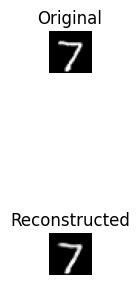

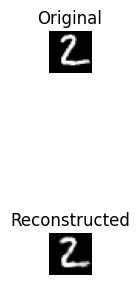

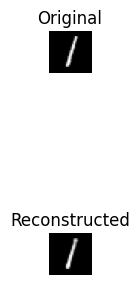

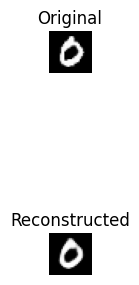

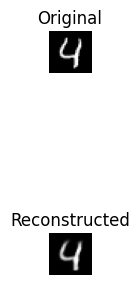

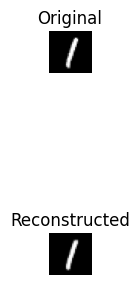

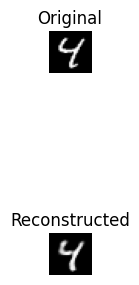

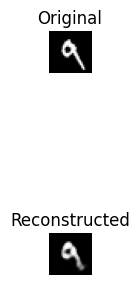

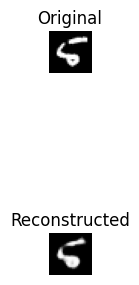

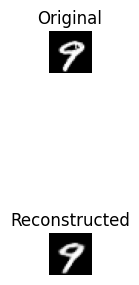

In [ ]:
n = 10
# plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  plt.title("Original")
  plt.axis("off")
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decodde_imgs[i].reshape(28,28),cmap='gray')
  plt.title("Reconstructed")
  plt.axis("off")
  plt.show()